In [12]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_path = "data/mouse_drug_data.csv"
clinical_trial_data_path = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_path)
ct_data = pd.read_csv(clinical_trial_data_path)

mouse_data.head()
ct_data.head()
# Combine the data into a single dataset
df = mouse_data.merge(ct_data)

# Display the data table for preview

df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [42]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_vol = pd.DataFrame(df.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)']).reset_index()
# Convert to DataFrame

# Preview DataFrame
mean_tumor_vol.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [135]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
se_tumor_vol = pd.DataFrame(df.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)'])
# Convert to DataFrame

# Preview DataFrame


Timepoint
0     0.000000
5     0.448593
10    0.702684
15    0.838617
20    0.909731
25    0.881642
30    0.934460
35    1.052241
40    1.223608
45    1.223977
Name: Tumor Volume (mm3), dtype: float64

In [159]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked
drug_names = list(mean_tumor_vol['Drug'].unique())
group_data = [mean_tumor_vol[mean_tumor_vol['Drug'] == x] for x in drug_names]

drug_data = [list(x['Tumor Volume (mm3)']) for x in group_data]
timepoints = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

tumor_vol_mean = pd.DataFrame(dict(zip(drug_names, drug_data)), index=timepoints)
tumor_vol_mean.columns.name = 'Drug'
tumor_vol_mean.index.name = 'Timepoint'

tumor_vol_mean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


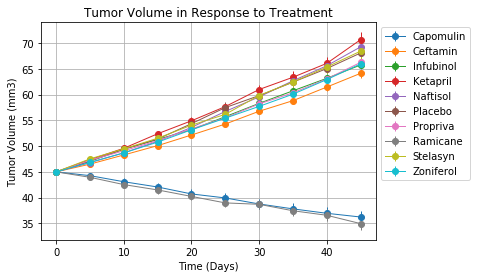

In [191]:
# Generate the Plot (with Error Bars)

# Save the Figure
fig, axes = plt.subplots()
for drug in drug_names:
    axes.errorbar(timepoints, tumor_vol_mean[drug], yerr=se_tumor_vol.loc[drug]['Tumor Volume (mm3)'], label=drug, marker='o', linewidth=1)

axes.set(title='Tumor Volume in Response to Treatment', xlabel = 'Time (Days)', ylabel = 'Tumor Volume (mm3)')
plt.grid()
plt.legend(loc=0, bbox_to_anchor=(1,1))
plt.show()


## Metastatic Response to Treatment

In [126]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame

mean_ms = pd.DataFrame(df.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites'])
mean_ms.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [150]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame
se_ms = pd.DataFrame(df.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites'])
se_ms.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [271]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked
group_data = [mean_ms.loc[drug]['Metastatic Sites'] for drug in drug_names]
metastatic_data = pd.DataFrame(dict(zip(drug_names, group_data)), index=timepoints)
metastatic_data.columns.name = 'Drug'
metastatic_data.index.name = 'Timepoint'
metastatic_data

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


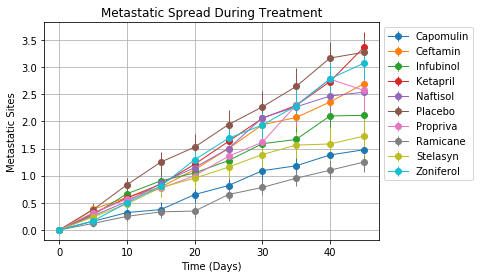

In [189]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure
fig, axes = plt.subplots()


for drug in drug_names:
    axes.errorbar(timepoints, list(metastatic_data[drug]), yerr=se_ms.loc[drug]['Metastatic Sites'], label=drug, marker='o', linewidth=1)

axes.set(title='Metastatic Spread During Treatment', xlabel='Time (Days)', ylabel='Metastatic Sites')
plt.grid()
plt.legend(loc=0, bbox_to_anchor=(1,1))
plt.show()

## Survival Rates

In [212]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame

mouse_counts = pd.DataFrame(df.groupby(['Drug', 'Timepoint']).count()['Mouse ID'])
mouse_counts.columns = ['Mouse Count']
mouse_counts.reset_index(inplace=True)
mouse_counts.head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [217]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame
group_data = [list(mouse_counts[mouse_counts['Drug'] == drug]['Mouse Count']) for drug in drug_names]
survival_data = pd.DataFrame(dict(zip(drug_names, group_data)), index=timepoints)

survival_data.columns.name = 'Drug'
survival_data.index.name = 'Timepoint'
survival_data

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


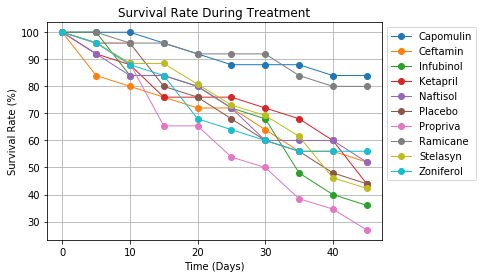

In [219]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure

fig, axes = plt.subplots()


for drug in drug_names:
    percentages = round(survival_data[drug]/survival_data[drug][0]*100,2)
    axes.plot(timepoints, percentages, label=drug, marker='o', linewidth=1)

axes.set(title='Survival Rate During Treatment', xlabel='Time (Days)', ylabel='Survival Rate (%)')
plt.grid()
plt.legend(loc=0, bbox_to_anchor=(1,1))
plt.show()

## Summary Bar Graph

In [238]:
# Calculate the percent changes for each drug

# Display the data to confirm

tumor_vol_pct_change = list(round((tumor_vol_mean.loc[45]-45)/45*100,2))
tumor_vol_pct_change.insert(1, tumor_vol_pct_change.pop(7))
tumor_vol_pct_change = tuple(tumor_vol_pct_change)
tumor_vol_pct_change

(-19.48, -22.32, 42.52, 46.12, 57.03, 53.92, 51.3, 47.24, 52.09, 46.58)

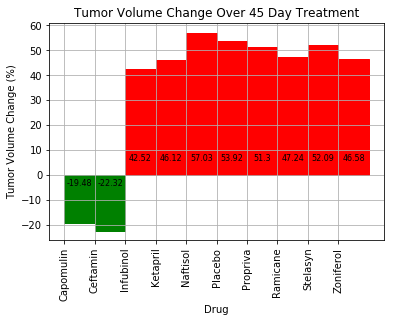

In [270]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure

fig, axes = plt.subplots()

bar_plot = axes.bar(drug_names, tumor_vol_pct_change, width=1, align='edge')


plt.xticks(rotation='vertical')
plt.grid()
for i in range(len(bar_plot)):
    if bar_plot[i].get_height() <= 0:
        bar_plot[i].set_color('g')
        axes.text(bar_plot[i].get_x() + bar_plot[i].get_width() / 2, 0 - 5, bar_plot[i].get_height(),
            ha='center', va='bottom', fontsize=8)
    else:
        bar_plot[i].set_color('r')
        axes.text(bar_plot[i].get_x() + bar_plot[i].get_width() / 2, 0 + 5, bar_plot[i].get_height(),
            ha='center', va='bottom', fontsize=8)

axes.set(title='Tumor Volume Change Over 45 Day Treatment', xlabel='Drug', ylabel='Tumor Volume Change (%)')
fig.show()

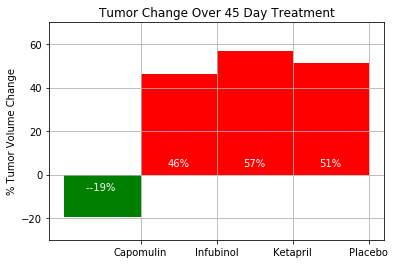